In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [3]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')


In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target
ee[:7] = 0
ee[20:] = 0
ee = ee * 2.5

In [7]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [8]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')
df.date_time = pd.to_datetime(df.date_time)

In [9]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [10]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [11]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

In [12]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']

In [43]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [8, 9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 219.8, 137.7,
                137.7, 137.7, 84.8, 84.8]

normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 138, 107.3,
                107.3, 107.3, 84.8, 84.8]

winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [14]:
import pyswarms as ps
from math import *
import random
import sys

In [15]:
class Particle:
    def __init__(self, max_iter):
        self.position = [0.0]*24  # particle current position
        self.velocity = [random.uniform(-1, 1) for _ in range(24)]  # particle current velocity
        self.best_position = [0.0]*24  # particle best position
        self.fitness = sys.maxsize   # particle fitness
        self.best_fitness = sys.maxsize  # particle best fitness
        self.iteration = 0 # 반복 횟수
        self.max_iter = max_iter

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.position)
        if self.fitness < self.best_fitness:
            self.best_position = self.position.copy()
            self.best_fitness = self.fitness

    def update_velocity(self, global_best_position):
        w_min = 0.7
        w_max = 1.2
        self.iteration += 1
        w = w_max - ((w_max - w_min) * self.iteration / self.max_iter)
        c1 = 1.5
        c2 = 2.5
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = c1 * r1 * (self.best_position[i] - self.position[i])
            social_velocity = c2 * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = w * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]
            if self.position[i] < bounds[i][0]:
                self.position[i] = bounds[i][0]
            elif self.position[i] > bounds[i][1]:
                self.position[i] = bounds[i][1]

class PSO:
    def __init__(self, fitness_function, bounds, num_particles, max_iter):
        self.fitness_func = fitness_function
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.global_best_position = [0.0]*24
        self.global_best_fitness = sys.maxsize
        self.swarm = [Particle(max_iter) for _ in range(num_particles)]

    def run_result(self):
        for i in range(self.max_iter):
            for j in range(self.num_particles):
                self.swarm[j].evaluate_fitness(self.fitness_func)
                if self.swarm[j].fitness < self.global_best_fitness:
                    self.global_best_position = self.swarm[j].position.copy()
                    self.global_best_fitness = self.swarm[j].fitness
            for j in range(self.num_particles):
                self.swarm[j].update_velocity(self.global_best_position)
                self.swarm[j].update_position(self.bounds)
        print('Best position:', self.global_best_position)
        print('Best fitness:', self.global_best_fitness)
        return self.global_best_position, self.global_best_fitness


In [16]:
power_generated = ee
power_price = winter_price
power_use = qq

In [17]:
price_dict = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}

In [44]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

other_max = [11, 13, 14, 15, 16, 17]
other_mid = [8, 9, 10, 12, 18, 19, 20, 21]
other_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

time_dict = {"winter_max": winter_max, "winter_mid": winter_mid, "winter_min": winter_min,
             "spring_max": other_max, "spring_mid": other_mid, "spring_min": other_min}

In [18]:
np.var(ee)

204942.64010158894

In [84]:
def compute_group_variances(data, prices):
    price_groups = {}
    # Group data by prices
    for d, p in zip(data, prices):
        if p not in price_groups:
            price_groups[p] = []
        price_groups[p].append(d)
    # Compute variances for each group
    group_variances = {k: np.var(v) for k, v in price_groups.items()}
    return group_variances

def fitness_func(position, season):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        if cumulative_used > cumulative_generated:  # Cannot use more than generated
            return sys.maxsize
        
        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price [i]  # Cost of using or selling power
        
        # if cumulative_used != power_generated.sum():
        #     return sys.maxsize

        # group_variances = compute_group_variances(consumption_pattern, season_price)
        # total_variance = sum(group_variances.values())
        
        # total_cost += total_variance
    return total_cost


bounds = [(0, power_use[i]) for i in range(24)]  # bounds based on generated power
pso = PSO(lambda x: fitness_func(x, "summer"), bounds, num_particles=500, max_iter=1000)
best_position, best_fitness = pso.run_result()


Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2533.7489115166604, 2540.8695911349905, 0, 759.1533229947426, 2439.1406753203414, 0, 0, 121.8923839629625, 0, 0, 0]
Best fitness: 5599687.346659772


In [48]:
def fitness_func(position, season, power_generated, power_use):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        if cumulative_used > cumulative_generated:  # Cannot use more than generated
            return sys.maxsize

        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price [i]  # Cost of using or selling power

    return total_cost

def cal_price(power_generated, power_use, weather):
    bounds = [(0, power_use[i]) for i in range(24)]  # bounds based on generated power
    pso = PSO(lambda x: fitness_func(x, "summer", power_generated, power_use), bounds, num_particles=500, max_iter=1000)
    best_position, best_fitness = pso.run_result()
    weather_price = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}
    before_price = np.dot(power_use, weather_price[weather])
    return best_position, best_fitness, before_price


In [27]:
def cal_price(power_generated, power_use, weather):
    power_generated = power_generated
    power_use = power_use    
    bounds = [(0, power_use[i]) for i in range(24)]  # bounds based on generated power
    pso = PSO(lambda x: fitness_func(x, "summer"), bounds, num_particles=500, max_iter=1000)
    best_position, best_fitness = pso.run_result()
    weather_price = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}
    before_price = np.dot(qq, weather_price[weather])
    return best_position, best_fitness, before_price

In [45]:
def image_draw(best_position, weather):
    weather_price = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}
    time_dict = {"winter_max": winter_max, "winter_mid": winter_mid, "winter_min": winter_min,
             "other_max": other_max, "other_mid": other_mid, "other_min": other_min}
    if weather != "winter":
        weather_change = "other"
    else:
        weather_change = weather
        
    weather_max = time_dict[weather_change + "_max"]
    weather_mid = time_dict[weather_change + "_mid"]
    weather_min = time_dict[weather_change + "_min"]


    fig, ax1 = plt.subplots(figsize=(10, 8))
    ax1.set_xlabel('시간', fontsize=15)
    ax1.set_ylabel('태양광 발전 사용량(kWh)', color='green', fontsize=15)
    ax1.plot(best_position, color='green', label='태양광 발전 사용량(kWh)', linewidth = 3)
    ax1.tick_params(axis='y', labelcolor='green', labelsize=12)
    ax1.set_xticks(np.arange(0, 24, 1))
    ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
    ax1.set_title(weather, fontsize=15)

    ax2 = ax1.twinx()

    ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
    ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
    ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

    plt.plot(qq-best_position, color='r', label='구매전력 소비량', linewidth = 3)

    for i in weather_max:
        if i == weather_max[-1]:
            ax1.axvspan(i, i+1, alpha=0.3, color='red', label='최대 부하 가격')
        else:
            ax1.axvspan(i, i+1, alpha=0.3, color='red')
        
    for i in weather_mid:
        if i == weather_mid[-1]:
            ax1.axvspan(i, i+1, alpha=0.3, color='orange', label='중간 부하 가격')
        else:
            ax1.axvspan(i, i+1, alpha=0.3, color='orange')

    for i in weather_min:
        if i == weather_min[-1]:
            ax1.axvspan(i, i+1, alpha=0.3, color='green', label='최소 부하 가격')
        else:
            ax1.axvspan(i, i+1, alpha=0.3, color='green')

    fig.legend(loc='upper left',  fontsize = 11)
    plt.grid(True)
    plt.show()

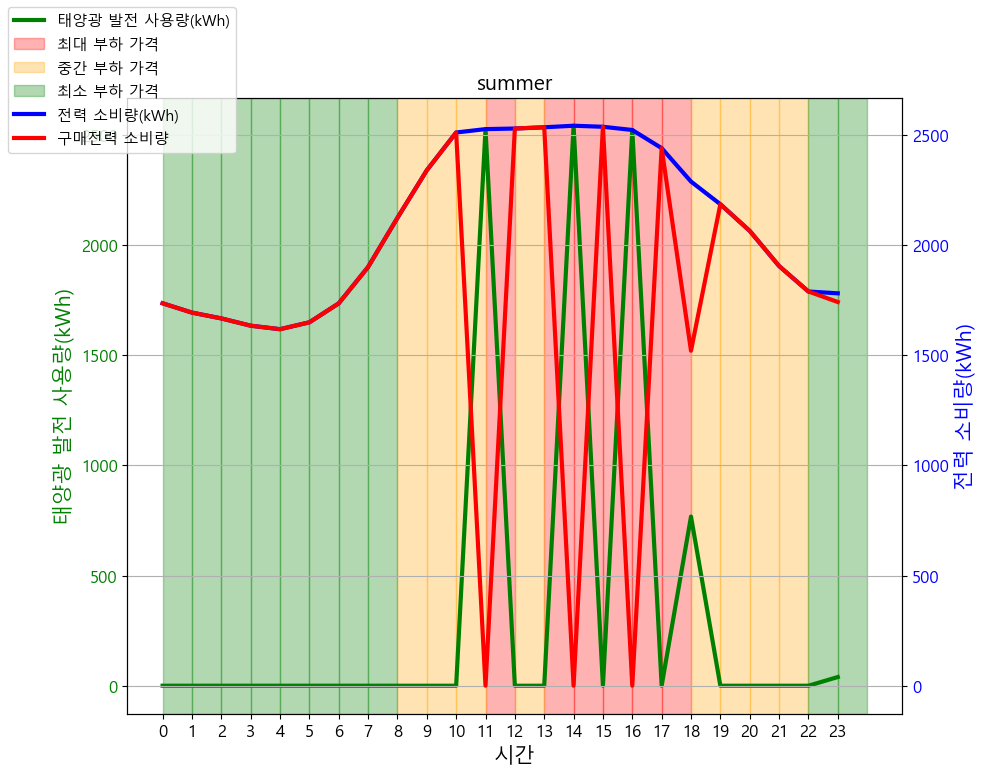

In [50]:
image_draw(best_position, "summer")

In [29]:
cal_price(qq, ee, "summer")

Best position: [0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 649.4658390802483, 934.1212221643565, 1145.8717112846875, 0, 1202.1816332218507, 1069.2157817725754, 0, 512.9546962095875, 233.0404473244147, 82.51842251950947, 39.37393394648829, 0.0, 0, 0, 0]
Best fitness: 6278153.330831437


([0.0,
  0,
  0.0,
  0.0,
  0.0,
  0,
  0,
  0,
  0,
  649.4658390802483,
  934.1212221643565,
  1145.8717112846875,
  0,
  1202.1816332218507,
  1069.2157817725754,
  0,
  512.9546962095875,
  233.0404473244147,
  82.51842251950947,
  39.37393394648829,
  0.0,
  0,
  0,
  0],
 6278153.330831437,
 7434858.095643961)

In [15]:
x: int=55

In [17]:
x

55

In [16]:
x

55

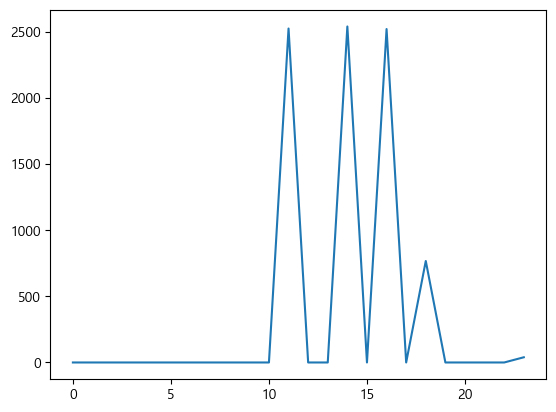

In [20]:
plt.plot(best_position)

In [21]:
sum(best_position)

8394.804891705873

In [22]:
ee.sum()

8394.804900710611

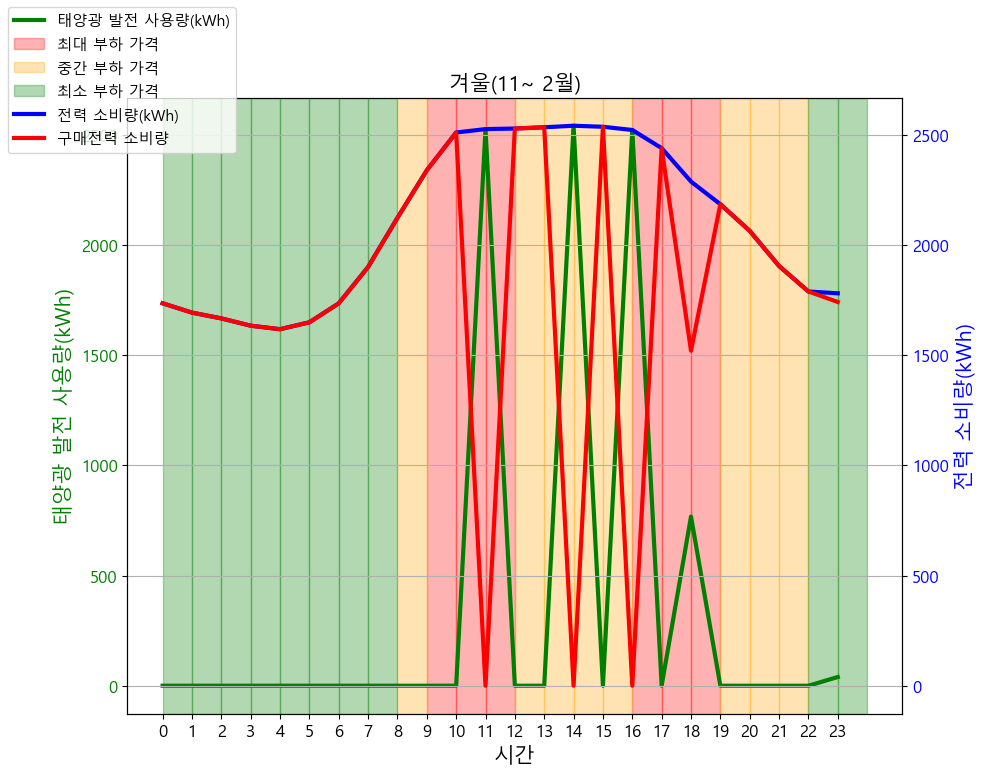

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='green', fontsize=15)
ax1.plot(best_position, color='green', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='green', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-best_position, color='r', label='구매전력 소비량', linewidth = 3)

for i in winter_max:
    if i == winter_max[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='red', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='red')
    
for i in winter_mid:
    if i == winter_mid[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange', label='중간 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange')

for i in winter_min:
    if i == winter_min[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='green', label='최소 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='green')

fig.legend(loc='upper left',  fontsize = 11)
plt.grid(True)
plt.show()

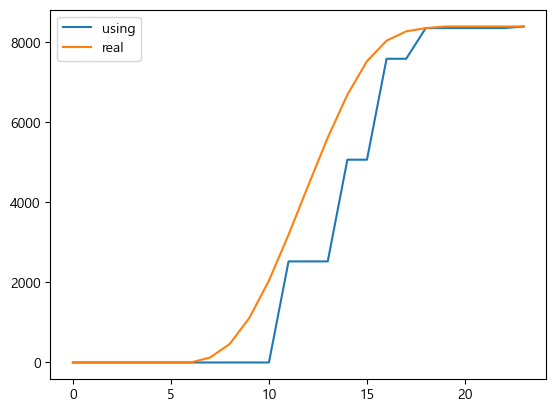

In [24]:
plt.plot(np.array(best_position).cumsum(), label = 'using')
plt.plot(ee.cumsum(), label = 'real')
plt.legend()
plt.show()

In [25]:
print(((qq-ee)*summer_price).sum())
print(((qq-best_position)*summer_price).sum())


5868019.106600938
5594995.4655789705
